In [1]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data1 = pd.read_csv('../dataset/Regular_Season_Batter.csv')
data2 = pd.read_csv('../dataset/Regular_Season_Batter_Day_by_Day.csv')
data3 = pd.read_csv('../dataset/Pre_Season_Batter.csv')
data4 = pd.read_csv('../dataset/submission.csv')

In [3]:
print('data1.shape: ',data1.shape)
print('data2.shape: ',data2.shape)
print('data3.shape: ',data3.shape)
print('data4.shape: ',data4.shape)

data1.shape:  (2454, 29)
data2.shape:  (109771, 20)
data3.shape:  (1393, 29)
data4.shape:  (220, 2)


## 범주형자료
- year
    - 시즌별 중간에 쉰 횟수 (부상의 가능성이 있을 수 있다.)
- team
- position


## 연속형자료
- 나머지

# train set, validation set, test set
- train set
    - 1995~2017년까지의 data
- validation set
    - 2018년까지의 data
- test set
    - 2019년 선수별 성적

# OPS ( OBP + SLG )
## OBP
- https://ko.wikipedia.org/wiki/%EC%B6%9C%EB%A3%A8%EC%9C%A8
- 여기서 데이터에 없는건 희생플라이(SF)

## SLG
- https://ko.wikipedia.org/wiki/%EC%9E%A5%ED%83%80%EC%9C%A8

# Regular_Season_Batter

In [4]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2454 entries, 0 to 2453
Data columns (total 29 columns):
batter_id          2454 non-null int64
batter_name        2454 non-null object
year               2454 non-null int64
team               2454 non-null object
avg                2428 non-null float64
G                  2454 non-null int64
AB                 2454 non-null int64
R                  2454 non-null int64
H                  2454 non-null int64
2B                 2454 non-null int64
3B                 2454 non-null int64
HR                 2454 non-null int64
TB                 2454 non-null int64
RBI                2454 non-null int64
SB                 2454 non-null int64
CS                 2454 non-null int64
BB                 2454 non-null int64
HBP                2454 non-null int64
SO                 2454 non-null int64
GDP                2454 non-null int64
SLG                2428 non-null float64
OBP                2430 non-null float64
E                  2454 non

In [5]:
data1.head()

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS
0,0,가르시아,2018,LG,0.339,50,183,27,62,9,...,3,0.519,0.383,9,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.902
1,1,강경학,2011,한화,0.000,2,1,0,0,0,...,0,0.000,0.000,1,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.000
2,1,강경학,2014,한화,0.221,41,86,11,19,2,...,1,0.349,0.337,6,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.686
3,1,강경학,2015,한화,0.257,120,311,50,80,7,...,3,0.325,0.348,15,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.673
4,1,강경학,2016,한화,0.158,46,101,16,16,3,...,5,0.257,0.232,7,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.489


## Year

In [41]:
data1.year.unique()

array([2018, 2011, 2014, 2015, 2016, 2017, 2013, 2005, 2006, 2007, 2008,
       2012, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2009, 2010,
       1996, 1993, 1994, 1995], dtype=int64)

## 아이디별 평균 OPS 

In [6]:
mean_ops_by_id = data1.groupby('batter_id').mean()['OPS']

In [7]:
mean_ops_by_id[mean_ops_by_id.isnull() == True]
data1[data1.batter_id==305]

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS
2215,305,최민구,2015,삼성,NaN,6,0,1,0,0,...,0,NaN,NaN,0,NaN,1992년 03월 17일,NaN,칠성초-대구중-대구상원고-영남대,NaN,NaN


In [8]:
mean_ops_by_id = mean_ops_by_id.fillna(0)

In [9]:
mean_ops_by_id.describe()

count    345.000000
mean       0.615126
std        0.193352
min        0.000000
25%        0.506600
50%        0.625736
75%        0.737400
max        1.173719
Name: OPS, dtype: float64

C:\Users\Jaehyuk Heo\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


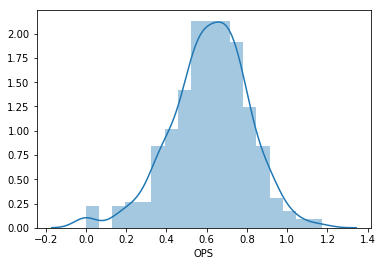

In [10]:
sns.distplot(mean_ops_by_id)

## 시즌 참가 횟수

In [18]:
pd.Series(data1.batter_id.value_counts()).describe()

count    345.000000
mean       7.113043
std        4.999009
min        1.000000
25%        3.000000
50%        6.000000
75%       11.000000
max       20.000000
Name: batter_id, dtype: float64

C:\Users\Jaehyuk Heo\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


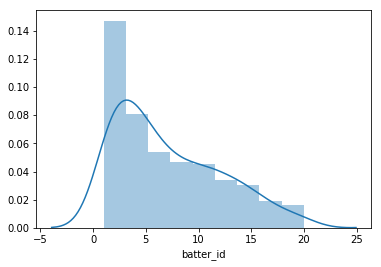

In [19]:
sns.distplot(data1.batter_id.value_counts())